## 1 задача
1. Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
2. Считать данные с помощью pandas
3. Вывести на экран первые 5 строк

In [2]:
import pandas as pd

df = pd.read_csv('laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


### 1.1 Изучите количество памяти с помощью matplotlib
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

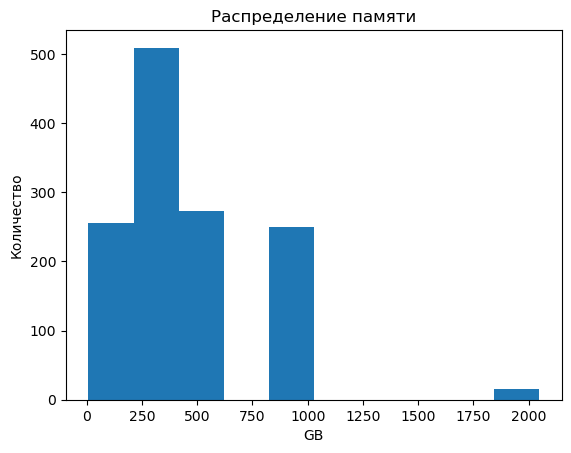

In [3]:
import matplotlib.pyplot as plt

plt.hist(df['Memory_Amount'])
plt.title('Распределение памяти')
plt.xlabel('GB')
plt.ylabel('Количество');

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

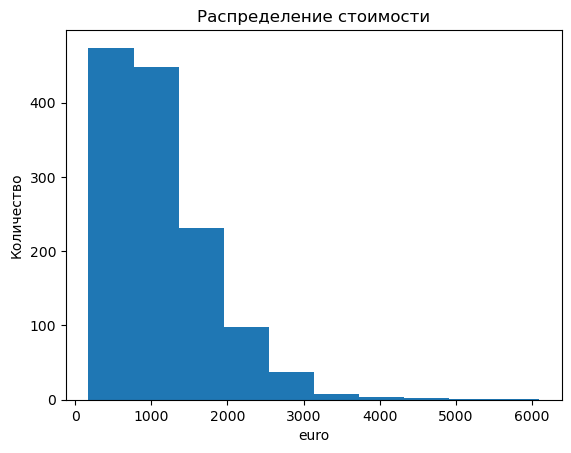

In [4]:
plt.hist(df['Price_euros'])
plt.title('Распределение стоимости')
plt.xlabel('euro')
plt.ylabel('Количество');

### 1.3 Изучите вес ноутбуков с помощью matplotlib
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

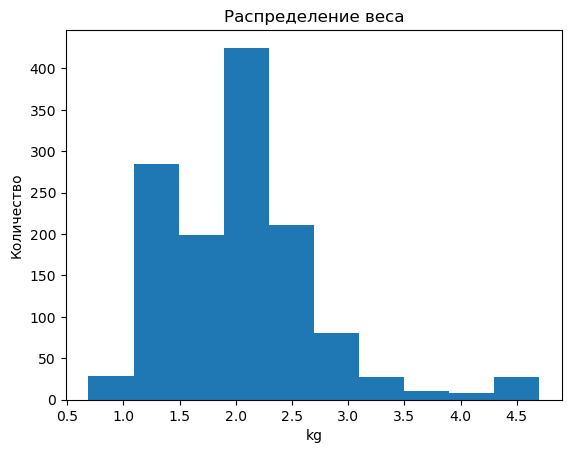

In [5]:
plt.hist(df['Weight'])
plt.title('Распределение веса')
plt.xlabel('kg')
plt.ylabel('Количество');

## 2 Задача
### 2.1 Изучите распределение типов носителя
- Постройте график
- Сделайте выводы

In [6]:
data = df['Memory_Type'].value_counts()
data

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

In [7]:
names = data.index
values = data.values

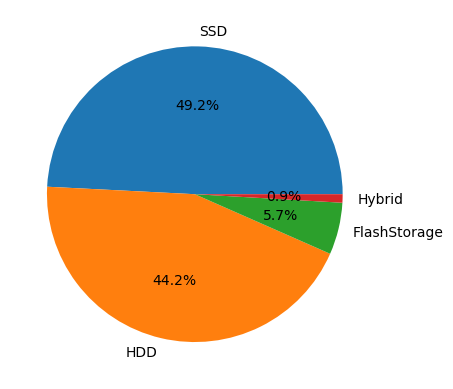

In [8]:
plt.pie(values, autopct='%.1f%%', labels=names);

### 2.2 Изучите распределение компаний производителей
- Постройте график
- Сделайте выводы

In [9]:
data = df['Company'].value_counts()
data

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [10]:
names = data.index
values = data.values

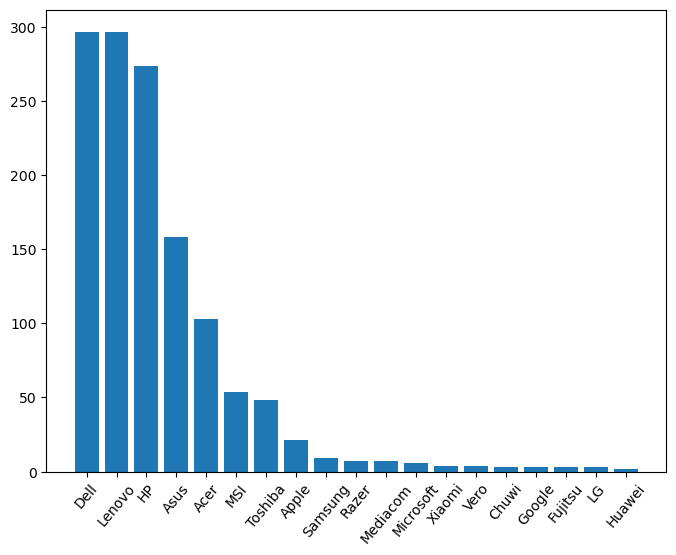

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(names, values)
plt.xticks(rotation=50);

### 2.3 Изучите распределение операционной системы
- Постройте график
- Сделайте выводы

In [12]:
data = df['OpSys'].value_counts()
data

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [13]:
names = data.index
values = data.values

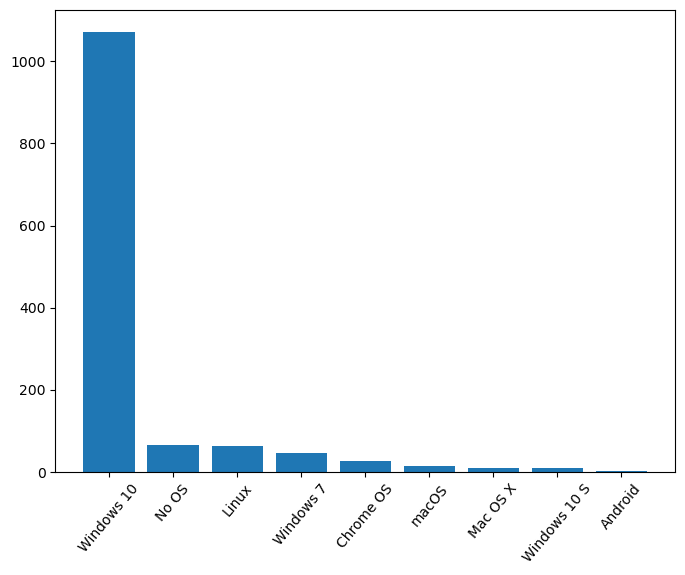

In [14]:
plt.figure(figsize=(8, 6))
plt.bar(names, values)
plt.xticks(rotation=50);

### 2.4 Изучите распределение компаний производителей CPU
- Постройте график
- Сделайте выводы

In [15]:
data = df['Cpu_Company'].value_counts()
data

Intel      1240
AMD          62
Samsung       1
Name: Cpu_Company, dtype: int64

In [16]:
names = data.index
values = data.values

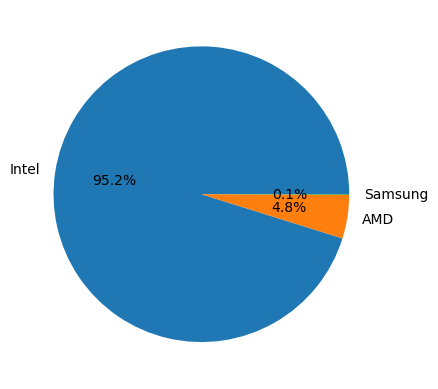

In [17]:
plt.pie(values, autopct='%.1f%%', labels=names);

## 3 задача
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму

Процессоры от Samsung не изучайте

### 3.1 Постройте график в абсолютных величинах

In [18]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
data = data.drop(columns=['Samsung']).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


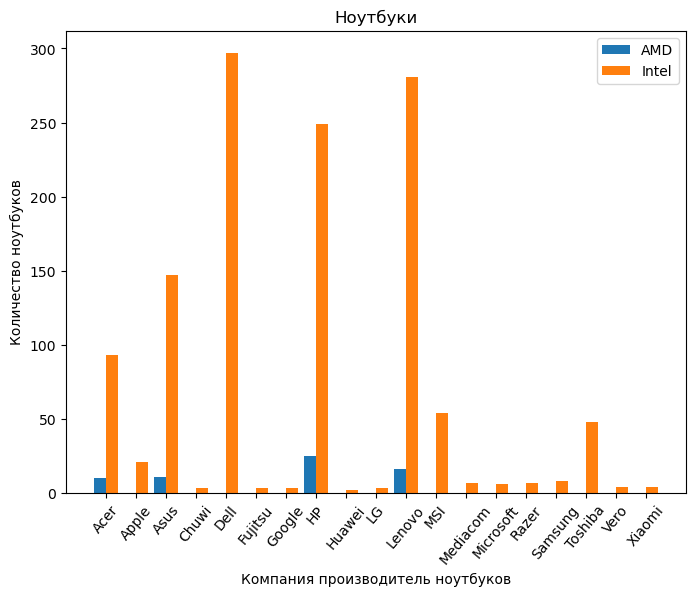

In [19]:
import numpy as np

plt.figure(figsize=(8, 6))
n_ticks = np.arange(len(data['AMD']))
offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, data['AMD'], width=w)
plt.bar(n_ticks + offset, data['Intel'], width=w)

plt.title('Ноутбуки')
plt.xlabel('Компания производитель ноутбуков')
plt.ylabel('Количество ноутбуков')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data['Company'], rotation=50);

### 3.2 Постройте график в относительных величинах

In [20]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index')
data = data.drop(columns=['Samsung']).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


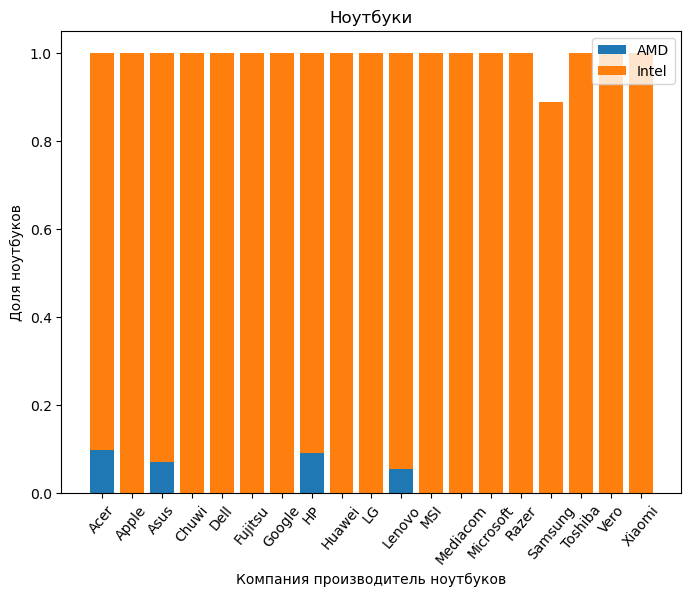

In [21]:
plt.figure(figsize=(8, 6))

plt.bar(data['Company'], data['AMD'])
plt.bar(data['Company'], data['Intel'], bottom=data['AMD'])

plt.title('Ноутбуки')
plt.xlabel('Компания производитель ноутбуков')
plt.ylabel('Доля ноутбуков')
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation=50);

## 4 задача
### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

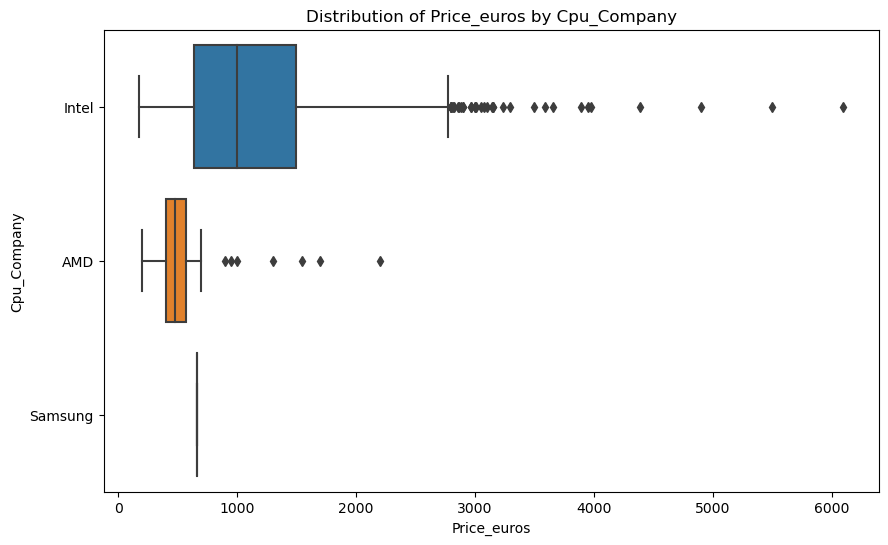

In [22]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], whis=1.5)

plt.xlabel('Price_euros')
plt.ylabel('Cpu_Company')
plt.title('Distribution of Price_euros by Cpu_Company');

### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

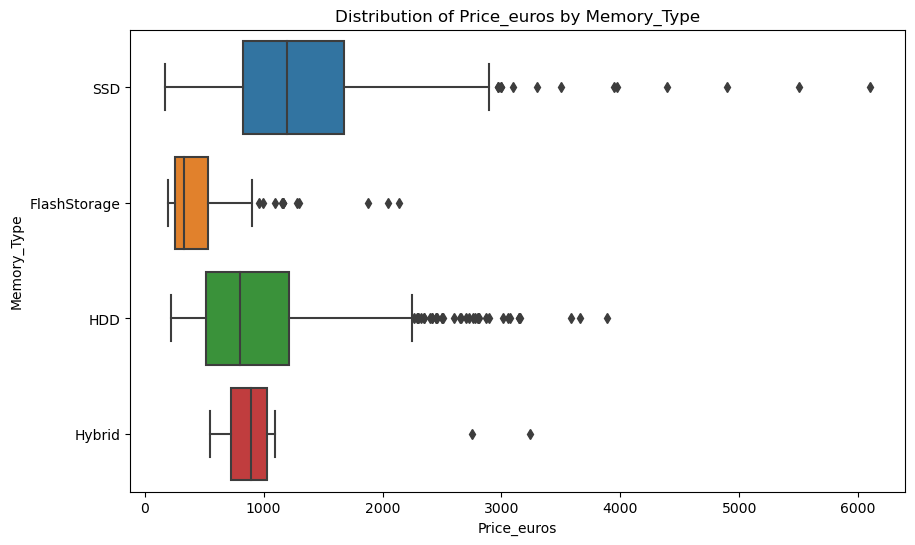

In [24]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], whis=1.5)

plt.xlabel('Price_euros')
plt.ylabel('Memory_Type')
plt.title('Distribution of Price_euros by Memory_Type');

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

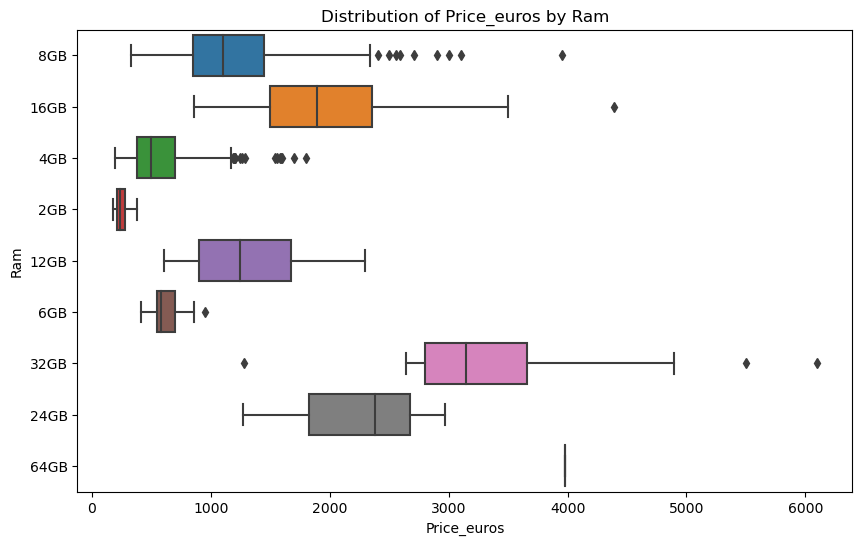

In [25]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Price_euros'], y=df['Ram'], whis=1.5)

plt.xlabel('Price_euros')
plt.ylabel('Ram')
plt.title('Distribution of Price_euros by Ram');

### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

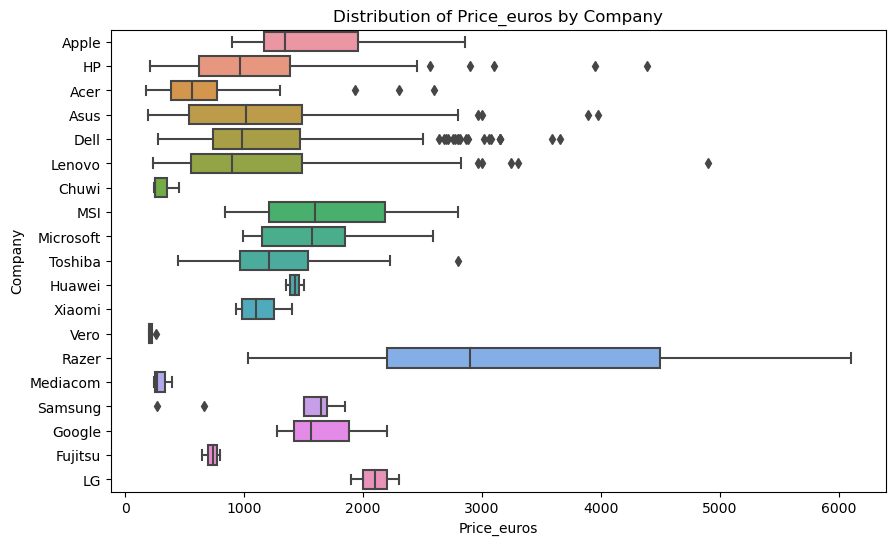

In [26]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Price_euros'], y=df['Company'], whis=1.5)

plt.xlabel('Price_euros')
plt.ylabel('Company')
plt.title('Distribution of Price_euros by Company');

## 5 задача*
Постройте матрицу корреляций для таблицы

In [29]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

/tmp/ipykernel_839/4194942596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.0,0.3
Weight,0.8,1.0,0.0,0.0
Price_euros,0.0,0.0,1.0,0.0
Memory_Amount,0.3,0.0,0.0,1.0


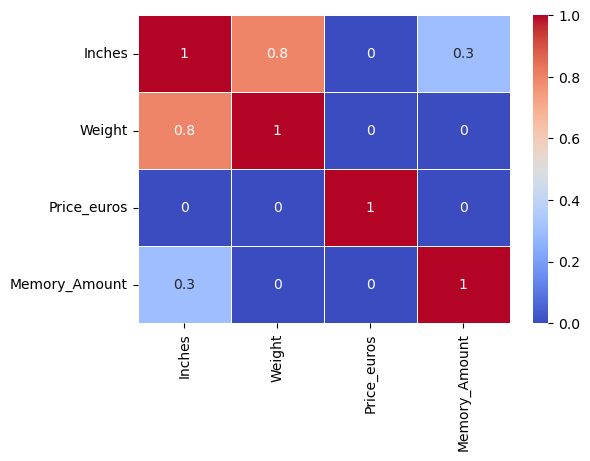

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

## 6 задание

In [44]:
df = pd.read_csv('kc_house_data.csv', sep=',')
df.head()
#df.to_excel(r'C:\Users\RustamYunusov\Desktop\GB Course\Основы языка Python для аналитиков\Pythton_Sem\1.xlsx')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.lat, point.long],
        radius=2,
        popup={'price':point.price,
               'floors':point.floors}
    ).add_to(this_map)
    
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

ModuleNotFoundError: No module named 'folium'